In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

KeyboardInterrupt: 

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Now you can access train_images and other variables
train_images.shape
len(train_labels)
train_labels
test_images.shape

2.15.0
4422102/4422102 [==============================] - 0s 0us/step


(10000, 28, 28)

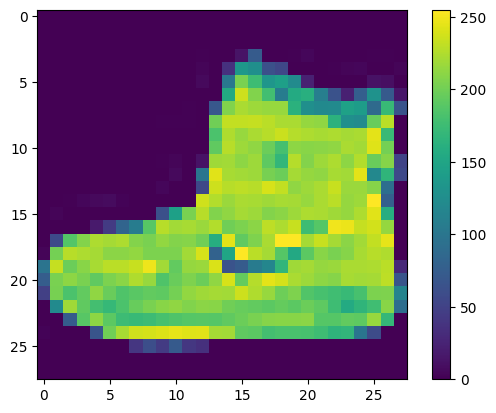

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

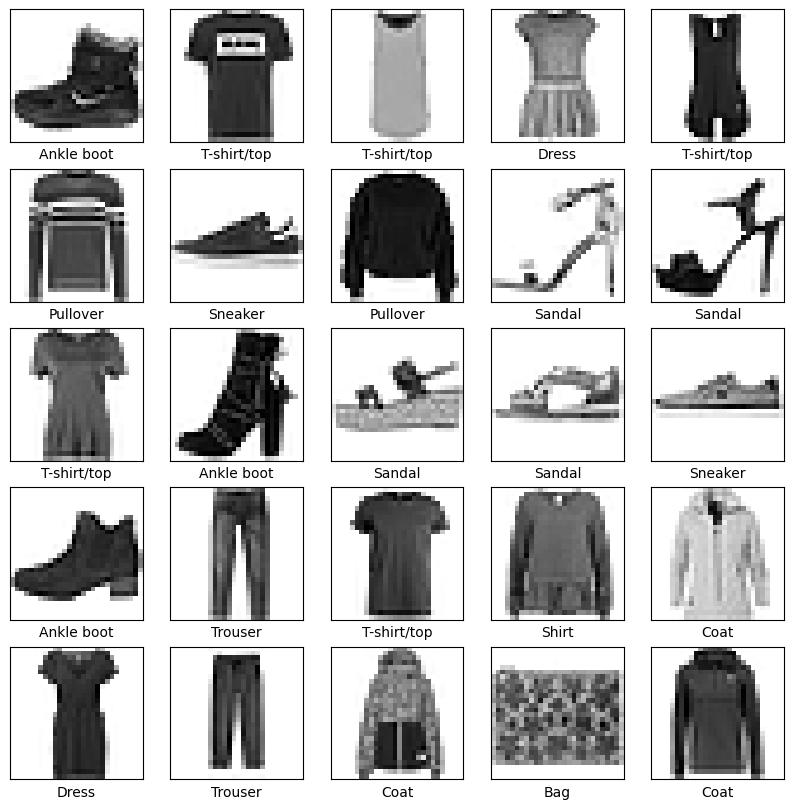

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 3.5356 - accuracy: 0.6719
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7184 - accuracy: 0.7225
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6197 - accuracy: 0.7642
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5785 - accuracy: 0.7868
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5467 - accuracy: 0.8044
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5197 - accuracy: 0.8196
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4965 - accuracy: 0.8273
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4895 - accuracy: 0.8315
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4912 - accuracy: 0.8342
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5714 - accuracy: 0.8185 - 796ms/epoch - 3ms/step

Test accuracy: 0.8184999823570251


In [13]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [15]:
predictions[0]

array([1.6536541e-15, 7.7598594e-11, 0.0000000e+00, 2.9520681e-09,
       0.0000000e+00, 1.4762104e-02, 4.0502746e-16, 6.6110849e-02,
       2.1453129e-11, 9.1912705e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

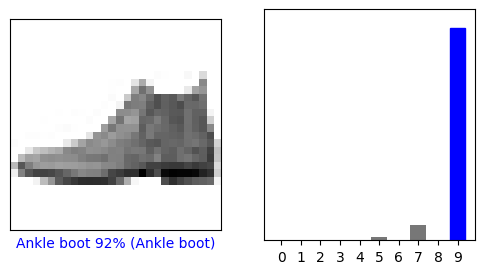

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

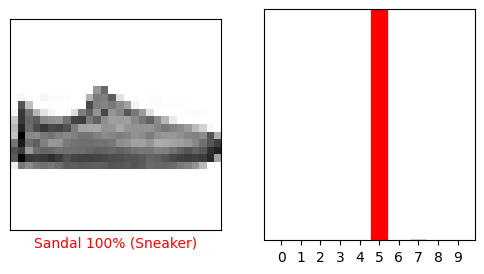

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

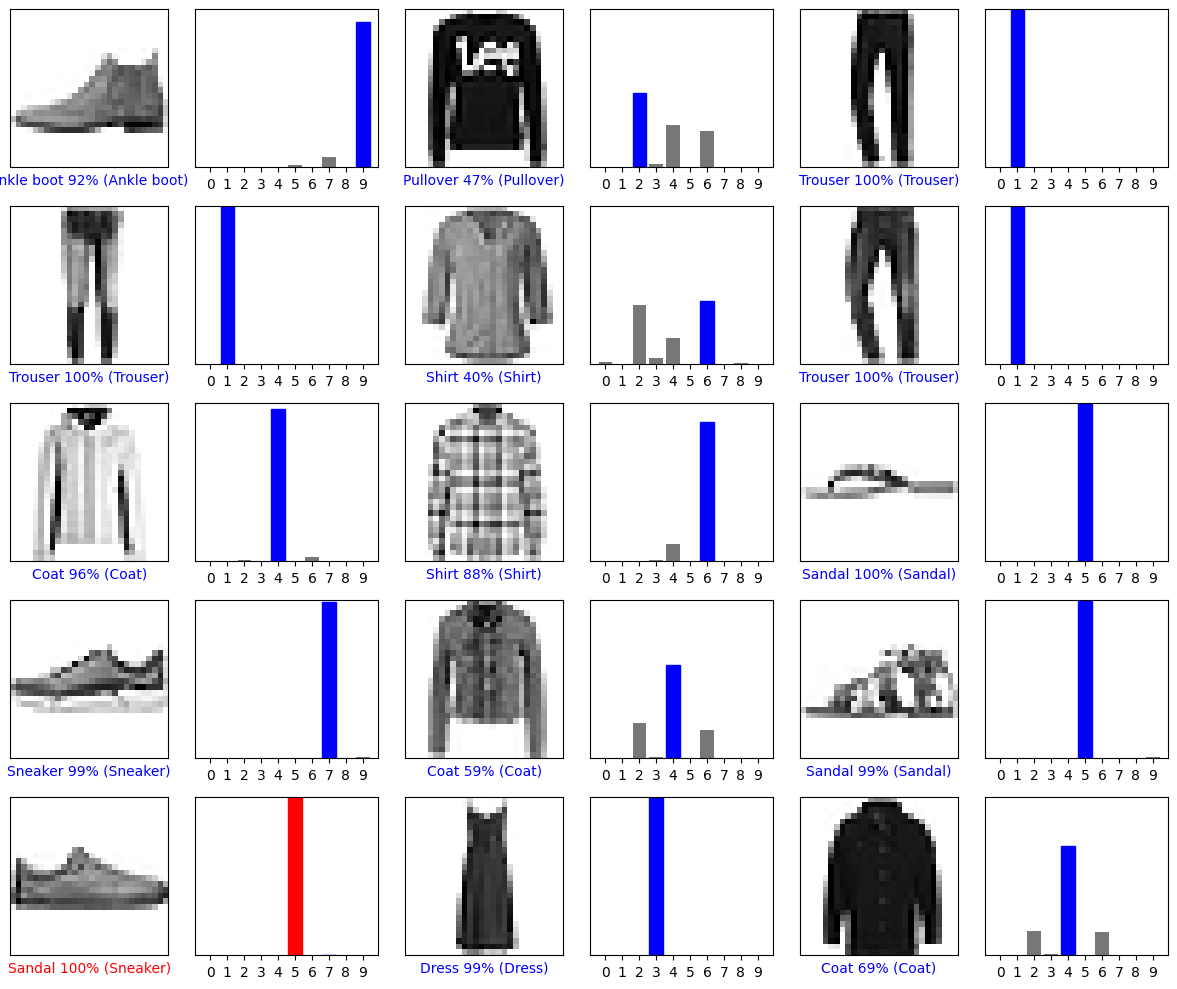

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [23]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 67ms/step
[[3.5826887e-03 1.1620018e-04 4.7124422e-01 2.2462729e-02 2.6881585e-01
  9.9187026e-05 2.3047088e-01 7.3189149e-13 3.2082687e-03 9.9789732e-10]]


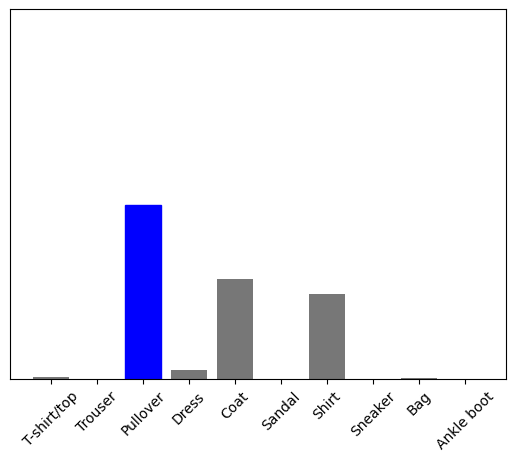

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

2